In [5]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
# root_proj = Path("/Users/yk/Documents/Projects/Pre-PhD")
# root_proj = Path("/Users/VERTPOM-UPJV/Documents/Banque_de_l'energie_V2/Data_prediction_K/Pre-PhD")
# root_proj = Path(r"D:/GIT-REPO/Pre-PhD")
root_proj = Path("/Users/alesk/Documents/Git-repo/Pre-PhD")
if str(root_proj/"src") not in sys.path:
    sys.path.append(str(root_proj/"src"))

In [6]:
root_proj.exists()

True

In [7]:
year = 2023
file_name = root_proj / f"DATA_SYSTEM_LIDL/DTS_LIDL_{year}.csv"
dts1 = pd.read_csv(file_name, sep=";")
dts1

,Date,PV,EV
0,1/01/2023 1:00,0.0,0.12
1,1/01/2023 1:15,0.0,0.08
2,1/01/2023 1:30,0.0,0.08
3,1/01/2023 1:45,0.0,0.12
4,1/01/2023 2:00,0.0,2.12
...,...,...,...
34940,31/12/2023 0:00,0.0,7.12
34941,31/12/2023 0:15,0.0,7.16
34942,31/12/2023 0:30,0.0,7.16
34943,31/12/2023 0:45,0.0,7.12


In [8]:
dts1["Date_utc"] = pd.to_datetime(
    dts1["Date"],
    format="%d/%m/%Y %H:%M"
)-pd.Timedelta(hours=1) 

dts1['offset'] = (dts1["Date_utc"].dt.tz_localize("UTC").dt.tz_convert("Europe/Paris").dt.tz_localize(None) - dts1["Date_utc"]).dt.total_seconds()//3600
dts1 




,Date,PV,EV,Date_utc,offset
0,1/01/2023 1:00,0.0,0.12,2023-01-01 00:00:00,1.0
1,1/01/2023 1:15,0.0,0.08,2023-01-01 00:15:00,1.0
2,1/01/2023 1:30,0.0,0.08,2023-01-01 00:30:00,1.0
3,1/01/2023 1:45,0.0,0.12,2023-01-01 00:45:00,1.0
4,1/01/2023 2:00,0.0,2.12,2023-01-01 01:00:00,1.0
...,...,...,...,...,...
34940,31/12/2023 0:00,0.0,7.12,2023-12-30 23:00:00,1.0
34941,31/12/2023 0:15,0.0,7.16,2023-12-30 23:15:00,1.0
34942,31/12/2023 0:30,0.0,7.16,2023-12-30 23:30:00,1.0
34943,31/12/2023 0:45,0.0,7.12,2023-12-30 23:45:00,1.0


In [9]:
d=dts1.index[dts1['Date'] == '27/03/2023 1:00']
dts1.iloc[d[0]:d[0]+10]

,Date,PV,EV,Date_utc,offset
8156,27/03/2023 1:00,0.0,11.12,2023-03-27 00:00:00,2.0
8157,27/03/2023 1:15,0.0,11.12,2023-03-27 00:15:00,2.0
8158,27/03/2023 1:30,0.0,11.12,2023-03-27 00:30:00,2.0
8159,27/03/2023 1:45,0.0,10.92,2023-03-27 00:45:00,2.0
8160,27/03/2023 2:00,0.0,10.56,2023-03-27 01:00:00,2.0
8161,27/03/2023 2:15,0.0,13.76,2023-03-27 01:15:00,2.0
8162,27/03/2023 2:30,0.0,9.96,2023-03-27 01:30:00,2.0
8163,27/03/2023 2:45,0.0,9.60,2023-03-27 01:45:00,2.0
8164,27/03/2023 3:00,0.0,9.36,2023-03-27 02:00:00,2.0
8165,27/03/2023 3:15,0.0,9.16,2023-03-27 02:15:00,2.0


In [10]:
temp = pd.read_csv(root_proj / f"DATA_SYSTEM_LIDL/Temperature/orly_{year}_hourly_weather.csv", sep=",")
temp["Date"]= pd.to_datetime(temp["time"], utc=True)
temp["Date_utc"] = pd.to_datetime(temp["time"], utc=True).dt.tz_localize(None)
temp['offset'] = (temp["Date"].dt.tz_convert("Europe/Paris").dt.tz_localize(None) - temp["Date_utc"]).dt.total_seconds()//3600
temp

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Date,Date_utc,offset
0,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0,2023-01-01 00:00:00+00:00,2023-01-01 00:00:00,1.0
1,2023-01-01 02:00:00+01:00,14.4,5.7,56.0,0.0,NaN,210.0,25.9,40.8,1014.7,NaN,3.0,2023-01-01 01:00:00+00:00,2023-01-01 01:00:00,1.0
2,2023-01-01 03:00:00+01:00,14.4,6.5,59.0,0.0,NaN,210.0,22.3,37.0,1014.9,NaN,3.0,2023-01-01 02:00:00+00:00,2023-01-01 02:00:00,1.0
3,2023-01-01 04:00:00+01:00,14.2,6.8,61.0,0.0,0.0,210.0,29.5,50.0,1015.7,NaN,3.0,2023-01-01 03:00:00+00:00,2023-01-01 03:00:00,1.0
4,2023-01-01 05:00:00+01:00,13.9,7.4,65.0,0.0,NaN,210.0,22.3,44.5,1015.9,NaN,4.0,2023-01-01 04:00:00+00:00,2023-01-01 04:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 20:00:00+01:00,8.1,3.7,74.0,0.0,NaN,230.0,31.7,38.9,1005.0,NaN,3.0,2023-12-31 19:00:00+00:00,2023-12-31 19:00:00,1.0
8756,2023-12-31 21:00:00+01:00,7.5,4.3,80.0,0.0,NaN,230.0,24.1,38.9,1005.9,NaN,3.0,2023-12-31 20:00:00+00:00,2023-12-31 20:00:00,1.0
8757,2023-12-31 22:00:00+01:00,7.4,4.5,82.0,0.0,0.0,220.0,20.5,44.0,1006.4,NaN,2.0,2023-12-31 21:00:00+00:00,2023-12-31 21:00:00,1.0
8758,2023-12-31 23:00:00+01:00,7.2,4.5,83.0,0.0,NaN,220.0,22.3,42.6,1006.6,NaN,2.0,2023-12-31 22:00:00+00:00,2023-12-31 22:00:00,1.0


In [11]:
temp_wanted = temp[temp["Date_utc"] <= "2023-12-31 00:00:00"]
temp_wanted = temp_wanted.set_index("Date_utc")
dts_t = temp_wanted.resample("15min").ffill()
dts_t = dts_t.reset_index()
dts_t = dts_t[["Date_utc","offset",'temp']]
dts_t


,Date_utc,offset,temp
0,2023-01-01 00:00:00,1.0,14.2
1,2023-01-01 00:15:00,1.0,14.2
2,2023-01-01 00:30:00,1.0,14.2
3,2023-01-01 00:45:00,1.0,14.2
4,2023-01-01 01:00:00,1.0,14.4
...,...,...,...
34940,2023-12-30 23:00:00,1.0,9.4
34941,2023-12-30 23:15:00,1.0,9.4
34942,2023-12-30 23:30:00,1.0,9.4
34943,2023-12-30 23:45:00,1.0,9.4


In [12]:
dts = dts1.merge(dts_t[['Date_utc','temp']], on="Date_utc")
dts

,Date,PV,EV,Date_utc,offset,temp
0,1/01/2023 1:00,0.0,0.12,2023-01-01 00:00:00,1.0,14.2
1,1/01/2023 1:15,0.0,0.08,2023-01-01 00:15:00,1.0,14.2
2,1/01/2023 1:30,0.0,0.08,2023-01-01 00:30:00,1.0,14.2
3,1/01/2023 1:45,0.0,0.12,2023-01-01 00:45:00,1.0,14.2
4,1/01/2023 2:00,0.0,2.12,2023-01-01 01:00:00,1.0,14.4
...,...,...,...,...,...,...
34940,31/12/2023 0:00,0.0,7.12,2023-12-30 23:00:00,1.0,9.4
34941,31/12/2023 0:15,0.0,7.16,2023-12-30 23:15:00,1.0,9.4
34942,31/12/2023 0:30,0.0,7.16,2023-12-30 23:30:00,1.0,9.4
34943,31/12/2023 0:45,0.0,7.12,2023-12-30 23:45:00,1.0,9.4


In [13]:
dts = dts[['Date_utc','offset','PV','EV','temp']]
dts = dts.rename(columns={"Date_utc":"Date"})
dts

,Date,offset,PV,EV,temp
0,2023-01-01 00:00:00,1.0,0.0,0.12,14.2
1,2023-01-01 00:15:00,1.0,0.0,0.08,14.2
2,2023-01-01 00:30:00,1.0,0.0,0.08,14.2
3,2023-01-01 00:45:00,1.0,0.0,0.12,14.2
4,2023-01-01 01:00:00,1.0,0.0,2.12,14.4
...,...,...,...,...,...
34940,2023-12-30 23:00:00,1.0,0.0,7.12,9.4
34941,2023-12-30 23:15:00,1.0,0.0,7.16,9.4
34942,2023-12-30 23:30:00,1.0,0.0,7.16,9.4
34943,2023-12-30 23:45:00,1.0,0.0,7.12,9.4


In [14]:
dts['hour'] = dts['Date'].dt.hour
# dts['minute'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.minute
dts['dayofyear'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofyear
dts['month'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.month
dts['dayofweek'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofweek
dts['hour_sin'] = np.sin(2*np.pi*dts['hour']/24)
dts['hour_cos'] = np.cos(2*np.pi*dts['hour']/24)
dts['doy_sin'] = np.sin(2*np.pi*dts['dayofyear']/365)
dts['doy_cos'] = np.cos(2*np.pi*dts['dayofyear']/365)
dts['dow_sin'] = np.sin(2*np.pi*dts['dayofweek']/7)
dts['dow_cos'] = np.cos(2*np.pi*dts['dayofweek']/7)

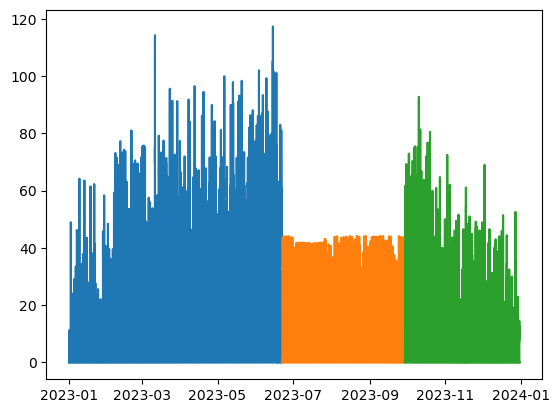

In [15]:
initial = dts.index[dts['Date'] == pd.Timestamp('2023-06-22 01:00:00', tz='Europe/Paris').tz_convert("UTC").tz_localize(None)][0]
final = dts.index[dts['Date'] == pd.Timestamp('2023-09-29 01:00:00', tz='Europe/Paris').tz_convert("UTC").tz_localize(None)][0]

df_train = dts.iloc[:initial]
df_test = dts.iloc[initial:final]
df_after = dts.iloc[final:]
plt.plot(df_train.Date.dt.tz_localize(None), df_train['PV'], label='Train')
plt.plot(df_test.Date.dt.tz_localize(None), df_test['PV'], label='Test')
plt.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

In [37]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
days = 160
forecaster = ForecasterRecursive(
    # regressor = XGBRegressor(n_estimators=460, learning_rate=0.01, random_state=42),
    regressor = LGBMRegressor(random_state=15926, verbose=-1),
    # regressor = RandomForestRegressor(random_state=42),
    lags = int((60/15)*24*days), # use previous two month
    window_features = RollingFeatures(stats=['max','std'], window_sizes=int((60/15)*24))
)

C:\Users\alesk\AppData\Local\Temp\ipykernel_31072\2895134457.py:7: FutureWarning: The `regressor` argument is deprecated and will be removed in a future version. Please use `estimator` instead.
  forecaster = ForecasterRecursive(


In [38]:
import joblib as jb
import json

output_dir = root_proj / "checkpoints" / "2023" / "15m" / "pv_160d_lgbm_2023_lim_temp_M_sin_h_doy"

if not (output_dir / "log.json").is_file(): # first train
    output_dir.mkdir(parents=True, exist_ok=True)
    # training
    forecaster.fit(y=df_train['PV'],exog=df_train[['temp','month','hour_sin','hour_cos','doy_sin','doy_cos']], store_in_sample_residuals=True)
    # residuals = forecaster.in_sample_residuals  # 查看训练残差
    # save model
    jb.dump(forecaster, output_dir/"model.joblib")
    # log
    log = {
        "metadata": {
            "description": "recursive rf",
            "lags": int(forecaster.lags[-1]),
            "window_features": {
                "type": forecaster.window_features[0].__class__.__name__ ,
                "stats": forecaster.window_features[0].stats,
                "window_size": forecaster.window_features[0].window_sizes
            },
            "freq": "15min"
        },
        # "residuals": forecaster.in_sample_residuals
    }
    # save log
    with open(output_dir/"log.json", "w") as f:
        json.dump(log, f, indent=2)
    print("End of training")
else:
    # 加载模型 | load model
    forecaster = jb.load(output_dir/"model.joblib")
    # load log
    with open(output_dir/"log.json", "r") as f:
        log = json.load(f)
    print("Loaded")

Loaded


In [39]:
yhat_test = forecaster.predict(steps=len(df_test), exog=df_test[['temp','month','hour_sin','hour_cos','doy_sin','doy_cos']])

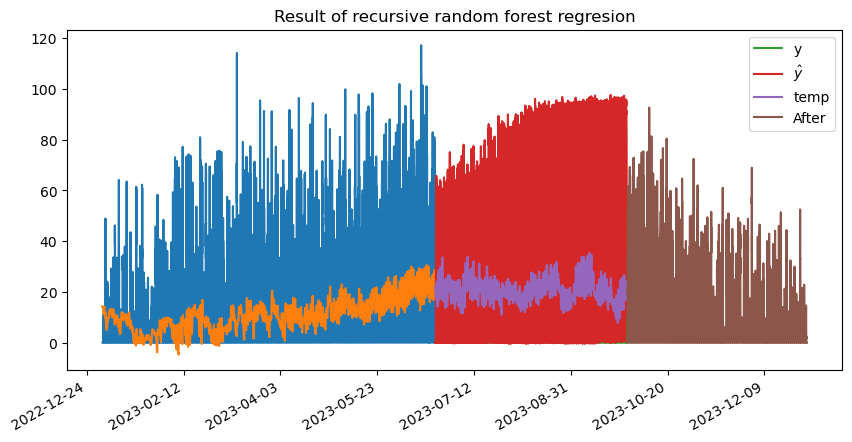

In [40]:
# Save and display the plot
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
ax.plot(df_train['Date'],df_train['PV'])
ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
ax.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()

fig.autofmt_xdate() # for rotation
fig.savefig(output_dir / "prediction_test.png", dpi=300, bbox_inches='tight')
plt.show()

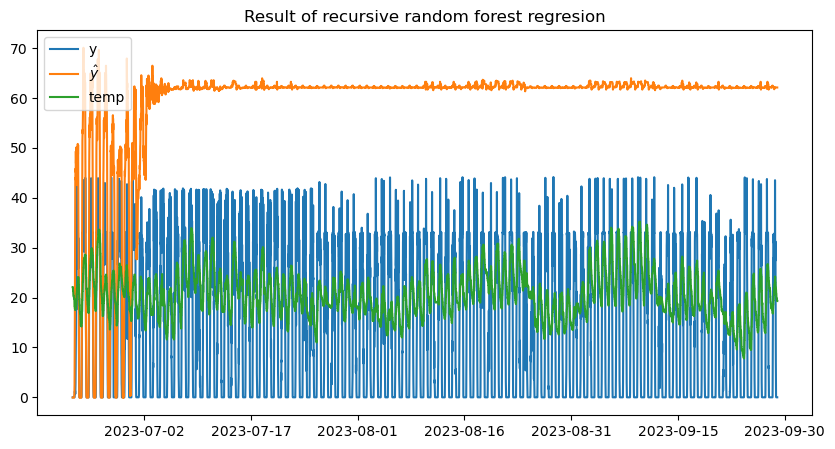

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
# ax.plot(df_train['Date'],df_train['PV'])
# ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
# ax.plot(df_after['Date'],df_after['PV'])

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()

In [20]:
len(df_train)

16504